In [5]:
import pandas as pd


In [96]:
bar = pd.read_csv("processed/bar_anotated.csv", sep=';')
baza = pd.read_csv("processed/baza_anatated.csv", sep=';')
baz = pd.read_csv("processed/bazilika_anotated.csv", sep=';')
kos = pd.read_csv("processed/kos_anotated.csv", sep=';')
stran = pd.read_csv("processed/stran_anotated.csv", sep=';')
p = pd.read_csv("processed/proc.csv")

df = pd.concat([bar, baza, baz, kos, stran])


In [97]:
df = df.drop("Column1", axis=1)
df = df.rename({"Column2": "class"}, axis=1)
df = pd.concat([df, p], ignore_index=True)

In [98]:
df.to_csv("dataset.csv")

In [78]:
k = {}
for i in df.word.unique():
    k[i] = df.loc[df['word'] == i]["class"].value_counts()
df["class"].value_counts()

0    367
1    263
Name: class, dtype: int64

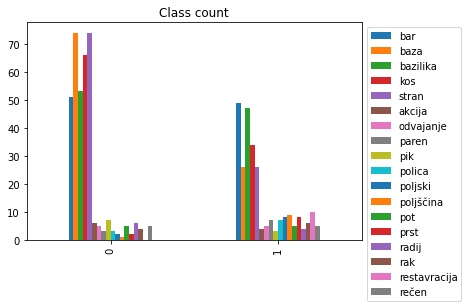

In [61]:
ax = pd.DataFrame(k).plot.bar()
ax.set_title("Class count",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot()
fig = ax.get_figure()
fig.savefig("class_count.png", bbox_inches='tight', dpi=250)

[0.5825396825396826, 0.4174603174603175]


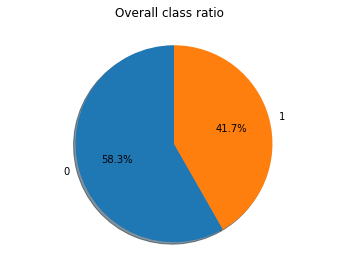

In [84]:
import matplotlib.pyplot as plt
c = df["class"].value_counts()
s = [c[0]/sum(c), c[1]/sum(c)]
print(s)
fig1, ax1 = plt.subplots()
ax1.pie([c[0], c[1]], labels=[0,1], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.suptitle("Overall class ratio")
fig1.savefig("overall_count.png", dpi=250)

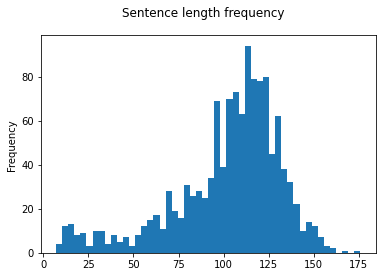

In [95]:
test = pd.DataFrame()
test2 = pd.DataFrame()
test["col1"] = df.sentence1.apply(len)
test2["col1"] = df.sentence2.apply(len)
test = pd.concat([test, test2], ignore_index=True)
ax = test["col1"].plot.hist(bins=50)
fig = ax.get_figure()
fig.suptitle("Sentence length frequency")
fig.savefig("freq.png", dpi=250)